In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

c:\Users\ernes\anaconda3\envs\easyOCR\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] No se encontró el proceso especificado'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


3
14
3


[[467, 447], [589, 447], [589, 507], [467, 507]]

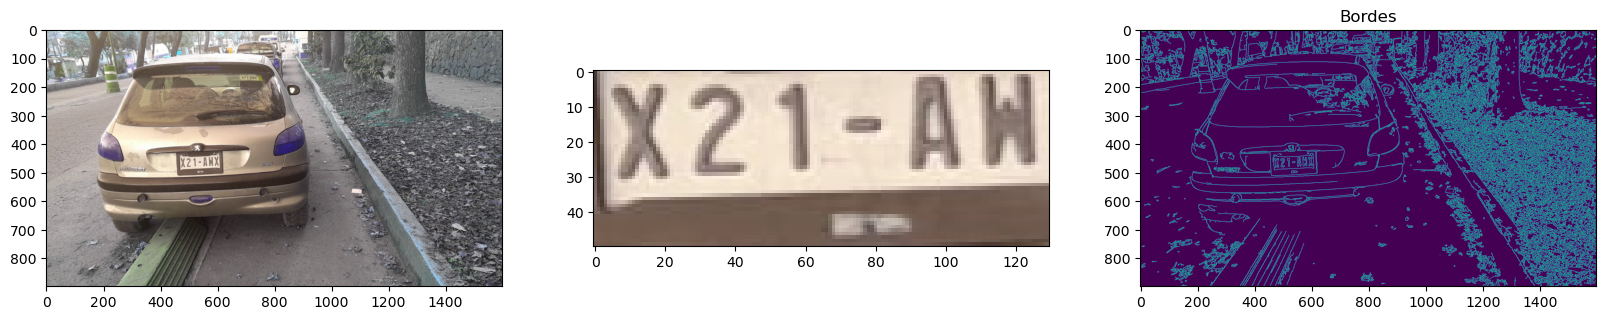

In [4]:
image = cv2.imread('C:\\Users\\ernes\\Documents\\Actividades\\Practicas\\Imagenes carros\\carro23.jpeg')

plt.figure(figsize=(20, 20))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection

#cv2.drawContours(edged, contours, -1, (0,255,0), 3)
plt.subplot(1, 3, 3)
plt.title("Bordes")
plt.imshow(edged)
reader = easyocr.Reader(['en'])
result = reader.readtext(edged, paragraph=True)

for i in range (0,len(result)):
    print(len(result[i][1]))
    if len(result[i][1])>= len(result[i-1][1]):
        coordenadas = result[i][0]

pts1 = np.float32([coordenadas[0],coordenadas[1],coordenadas[3], coordenadas[2]])
#locationAR = np.float32(result[0][0])
pts2 = np.float32([[0,0],[130,0],[0,50],[130,50]])

plt.subplot(1, 3, 1)
plt.imshow(image)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(image,M,(130,50))
plt.subplot(1, 3, 2)
plt.imshow(dst)
coordenadas
